# 1-7. 프로젝트: 가위바위보 분류기 만들기

### 학습목표: MNIST와 Sequenential Model을 배우고, 활용하여 가위바위보 분류기를 만들어 보자.

### 학습과정: 데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)

### 데이터 준비

####  데이터 불러오기 + Resize 하기

1. home/aiffel/rock_scissor_paper 안에 가위, 바위, 보 각각의 이미지 데이터를 224x224크기로 100장씩 저장해둡니다. 같은 폴더 내에 각각 20장씩의 테스트 데이터도 준비해 둡니다.

2. MNIST의 알고리즘을 사용하기 위해서는 똑같이 데이터 사이즈를 28x28로 만들어주어야 하기 때문에 PIL 라이브러리 패키지를 설치합니다. 

In [2]:
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


**이제 224x224의 훈련용 데이터 이미지를 28x28로 변경합니다.

In [3]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac15/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로 /home/ssac15/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로 /home/ssac15/aiffel/rock_scissor_paper/paper
바위 이미지 resize 완료!


**이제 mnist.load_data() 라는 함수를 이용하여 데이터의 형태를 (image,label)의 형태로 변환해 주어야 합니다.  

In [4]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


**한 번 이미지를 불러 볼까요?

라벨:  0


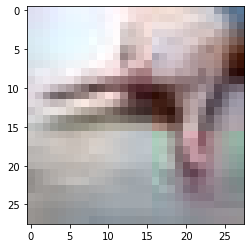

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

**짜잔.. 여기까지 데이터 준비-분석-전처리 과정을 무사히 마쳤으니 이제 딥러닝 네트워크 설계 단계로 넘어가 볼까요? ^^

###  딥러닝 네트워크 설계

1.이제 여기에서 텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법을 사용할 겁니다. 

2.딥러닝 네트워크에 설계된 코드는 tf.keras의 Sequential API를 이용한 LeNet입니다.

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# 손글씨 분류기에서 가장 높은 정확도를 보였던 변수를 조정한 값을 사용
n_channel_1=64 
n_channel_2=128
n_dense=128
n_train_epoch=10
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

#내가 만든 모델이 어떤 구조인지 보여줘~~
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (No

**CS231n 강의에서 보앗던 alexa의 구조도와 비슷한 구조의 모델이 만들어졌음을 확인 할 수 있었습니다. (이걸 알게 된 순간에 아드레날린이 마구마구 솟구쳤습니다~~ 끼욜~)

**이제 인공지능을 만들었으니, 학습을 시켜 볼 차례입니다.

###  딥러닝 네트워크 학습

1. 노드 1-4에서 손글씨 분류기를 학습시켰던 함수를 그대로 가져옵니다. 

2. 그대로 가져올 때, 이미지의 형태를 맞춰 주어야 합니다.  

In [28]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
# 이미지의 형태를 (x_train, y_train)
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 1.7855 - accuracy: 0.6867
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8800
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8633
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.9567
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9833
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9900
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000


### 딥러닝 네트워크 테스트

1. 처음 데이터를 준비할 때, 폴더에 만들어 두었던 20장의 테스트 이미지로  학습된 딥러닝 네트워크를 테스트해 보겠습니다.

2. 이 데이터도 먼저 데이터 싸이즈 조정과 형태를 변환해 주어야 합니다. 

In [32]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
#import os

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_test"

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
  
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_test"

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")


# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_test"

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    

In [35]:
def load_testdata(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=60   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("검사데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_testdata(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

검사데이터(x_test)의 이미지 개수는 60 입니다.
x_test shape: (60, 28, 28, 3)
y_test shape: (60,)


**테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.

In [36]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

2/2 - 1s - loss: 4.2318 - accuracy: 0.6000
test_loss: 4.231813430786133 
test_accuracy: 0.6000000238418579


## 총평

1. 딥러닝 신경망 구조를 이해할 수 있는 학습이었다. 

2. 텐서플로와 케라스의 활용을 해 볼 수 있어서, 코드를 처음부터 만들 수는 없지만 여러 모델을 이렇게 활용해서 만들어 봄으로써 점점 복잡한 단계의 모델도 이해하고 활용할 수 있게 될 것이라 생각한다. 

3. 학습 데이터의 갯수를 좀 더 늘리고 dense 값을 높이면 정확도가 더 올라갈 것이라 생각한다.